# Plots to Help Interpret Clusters

TLDR: Creating plots and graphs to interpret the results of a clustering, especially when there are more than two features. Assumes all features are numeric.

- Stephen W. Thomas
- Used for MMA 869, MMAI 869, and GMMA 869

In [1]:
import datetime
print(datetime.datetime.now())

2020-11-02 08:28:45.531537


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

# Read in Data

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/869_course/main/data/Mall_Customers.csv")

df = df.rename(index=str, columns={"Genre": "Male"})
df['Male'] = df['Male'].replace(['Male', 'Female'], [True, False])
df = df.drop(['CustomerID'], axis=1)
col_names = df.columns

df.info()
df.describe().transpose()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Male           200 non-null    bool 
 1   Age            200 non-null    int64
 2   AnnualIncome   200 non-null    int64
 3   SpendingScore  200 non-null    int64
dtypes: bool(1), int64(3)
memory usage: 6.4+ KB


,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
AnnualIncome,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


,Male,Age,AnnualIncome,SpendingScore
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


# Interpreting Clusters Case Study
We will use all 4 features, with Hierarchcial Clustering, wiht Euclidean distance and Ward Linkage

In [5]:
X = df.copy()

X.head()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0:10,]

,Male,Age,AnnualIncome,SpendingScore
0,True,19,15,39
1,True,21,15,81
2,False,20,16,6
3,False,23,16,77
4,False,31,17,40


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

In [6]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

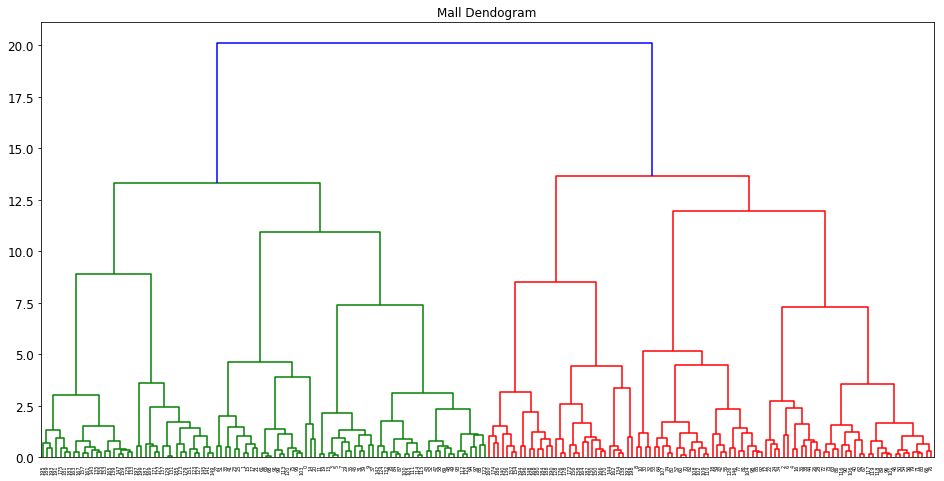

In [7]:
# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 
#plt.savefig('out/mall_dendro_1.png');

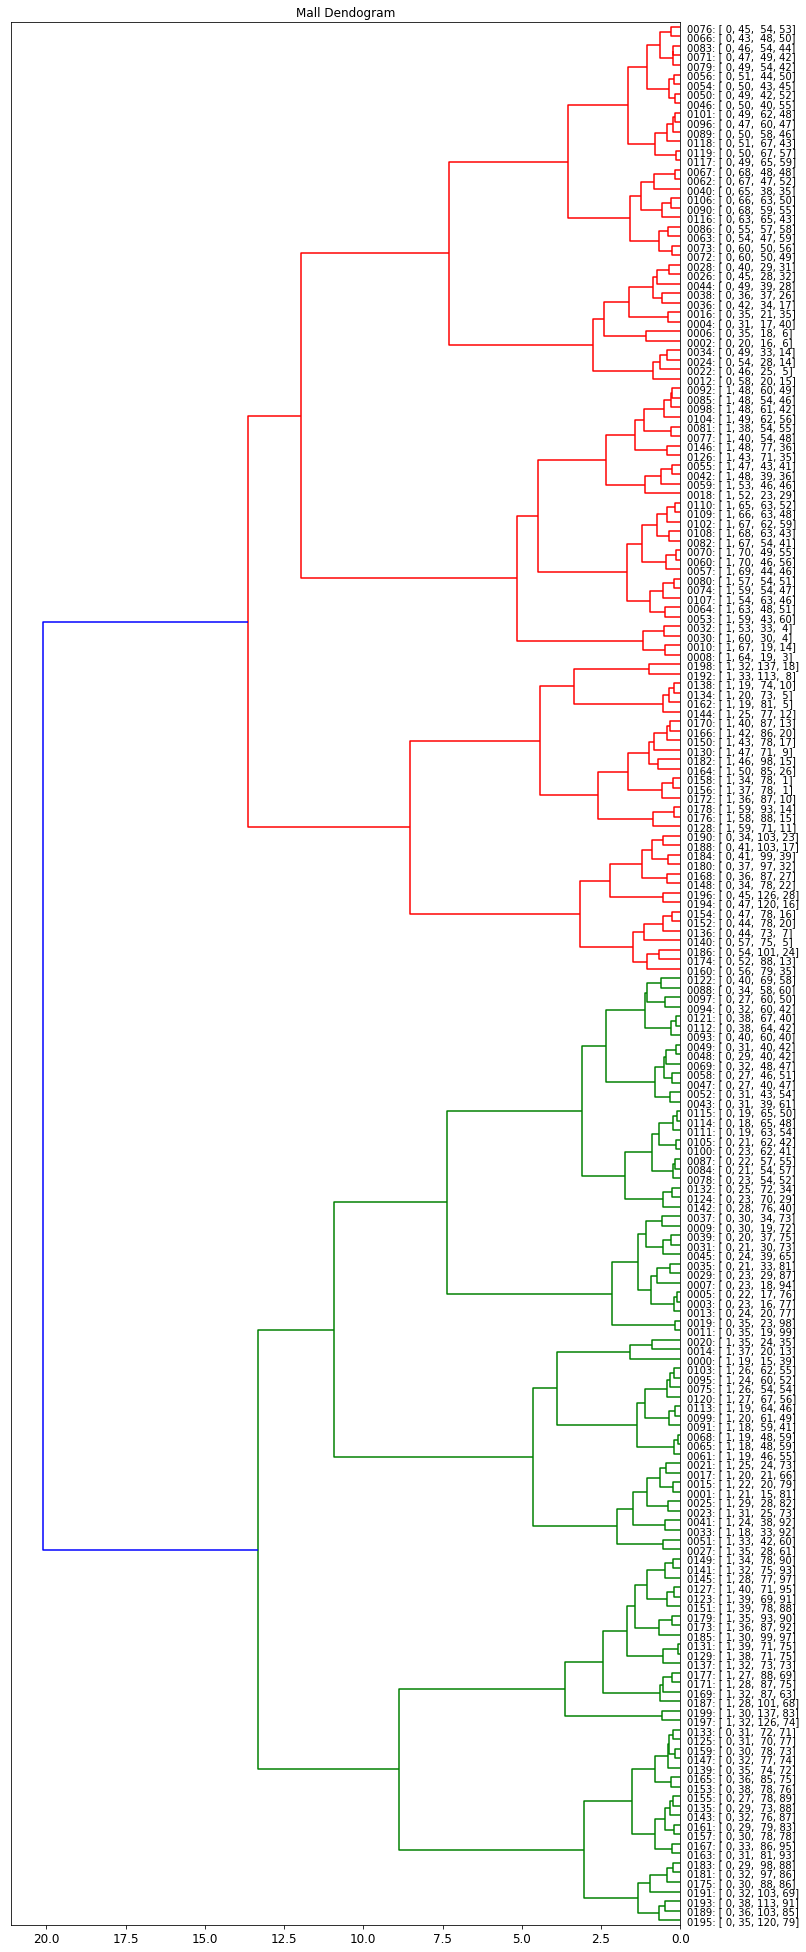

In [8]:
# Plot the dendogram 0 this time with better labels

# Cool custom function to give each leaf of the dendrogram a label - here, I'm just printing out feature values for each isntance in a pretty way.
def llf(id):
    Xr = [int(x) for x in scaler.inverse_transform(X[id, :])]
    return "{:>04d}: [{:>2d}, {:>2d}, {:>3d}, {:>2d}]".format(id, Xr[0], Xr[1], Xr[2], Xr[3])


# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(12, 35));
plt.grid(False)
plt.title("Mall Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl, orientation="left", leaf_font_size=10, leaf_label_func=llf); 

In [9]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

## For Each Cluster, Show Feature Means

In [10]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform(means[i,:]))
    
means


Cluster 1 (n=39):
[ 0.46 32.69 86.54 82.13]

Cluster 2 (n=61):
[ 0.38 26.15 43.77 58.97]

Cluster 3 (n=33):
[ 0.55 41.45 89.09 16.18]

Cluster 4 (n=29):
[ 1.   56.55 50.03 41.34]

Cluster 5 (n=38):
[ 0.   49.79 44.11 39.66]


array([[ 0.04, -0.44,  0.99,  1.24],
       [-0.13, -0.91, -0.64,  0.34],
       [ 0.21,  0.19,  1.09, -1.32],
       [ 1.13,  1.27, -0.4 , -0.34],
       [-0.89,  0.79, -0.63, -0.41]])

## For Each Cluster, Show (Even More) Feature Stats

In [11]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))
    

All Data:
Number of Instances: 200


,Min,Mean,Max,Variance,Skewness,Kurtosis
Male,0.00,0.44,1.00,0.94,0.56,-0.52
Age,18.00,38.85,70.00,52.85,45.57,29.31
AnnualIncome,15.00,60.56,137.00,86.89,68.93,57.26
SpendingScore,1.00,50.20,99.00,76.09,48.99,28.67



Cluster 1:
Number of Instances: 39


,Min,Mean,Max,Variance,Skewness,Kurtosis
Male,0.00,0.46,1.00,0.95,0.52,-0.54
Age,27.00,32.69,40.00,39.85,44.55,25.92
AnnualIncome,69.00,86.54,137.00,70.72,96.41,96.51
SpendingScore,63.00,82.13,97.00,53.60,47.41,19.20



Cluster 2:
Number of Instances: 61


,Min,Mean,Max,Variance,Skewness,Kurtosis
Male,0.00,0.38,1.00,0.92,0.69,-0.42
Age,18.00,26.15,40.00,41.68,46.73,28.13
AnnualIncome,15.00,43.77,76.00,73.21,58.64,25.12
SpendingScore,13.00,58.97,99.00,63.39,57.67,41.55



Cluster 3:
Number of Instances: 33


,Min,Mean,Max,Variance,Skewness,Kurtosis
Male,0.00,0.55,1.00,0.96,0.35,-0.54
Age,19.00,41.45,59.00,47.81,34.55,32.56
AnnualIncome,71.00,89.09,137.00,70.89,93.18,86.22
SpendingScore,1.00,16.18,39.00,53.65,63.71,44.61



Cluster 4:
Number of Instances: 29


,Min,Mean,Max,Variance,Skewness,Kurtosis
Male,1.00,1.00,1.00,0.44,0.44,-1.05
Age,38.00,56.55,70.00,45.58,36.55,22.07
AnnualIncome,19.00,50.03,77.00,68.85,45.31,55.02
SpendingScore,3.00,41.34,60.00,60.31,15.55,72.17



Cluster 5:
Number of Instances: 38


,Min,Mean,Max,Variance,Skewness,Kurtosis
Male,0.00,0.00,0.00,0.44,-0.06,-0.55
Age,20.00,49.79,68.00,46.87,34.32,45.03
AnnualIncome,16.00,44.11,67.00,69.50,53.00,34.67
SpendingScore,5.00,39.66,59.00,60.41,28.06,38.79


In [12]:
# Or, we could have used panda's group-by function
import pandas as pd

X_df = pd.DataFrame(scaler.inverse_transform(X), columns=col_names)
X_df['Cluster'] = labels
X_df.head()

cl_group = X_df.groupby(['Cluster']).agg('describe')
cl_group

cl_group.info()
cl_group['Age']

,Male,Age,AnnualIncome,SpendingScore,Cluster
0,1.00,19.00,15.00,39.00,2
1,1.00,21.00,15.00,81.00,2
2,0.00,20.00,16.00,6.00,5
3,0.00,23.00,16.00,77.00,2
4,0.00,31.00,17.00,40.00,5


Male                                      Age        ...  \
        count mean  std  min  25%  50%  75%  max count  mean  ...   
Cluster                                                       ...   
1       39.00 0.46 0.51 0.00 0.00 0.00 1.00 1.00 39.00 32.69  ...   
2       61.00 0.38 0.49 0.00 0.00 0.00 1.00 1.00 61.00 26.15  ...   
3       33.00 0.55 0.51 0.00 0.00 1.00 1.00 1.00 33.00 41.45  ...   
4       29.00 1.00 0.00 1.00 1.00 1.00 1.00 1.00 29.00 56.55  ...   
5       38.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 38.00 49.79  ...   

        AnnualIncome        SpendingScore                                      \
                 75%    max         count  mean   std   min   25%   50%   75%   
Cluster                                                                         
1              95.00 137.00         39.00 82.13  9.36 63.00 74.50 83.00 90.00   
2              60.00  76.00         61.00 58.97 18.43 13.00 46.00 55.00 73.00   
3              98.00 137.00         33.00 16.18  9.42  1.00 10.00 15.00 22.00   
4              62.00  77.00         29.00 41.34 16.13  3.00 36.00 46.00 51.00   
5              56.25  67.00         38.00 39.66 16.22  5.00 31.25 44.50 51.50   

               
          max  
Cluster        
1       97.00  
2       99.00  
3       39.00  
4       60.00  
5       59.00  

[5 rows x 32 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Male, count)           5 non-null      float64
 1   (Male, mean)            5 non-null      float64
 2   (Male, std)             5 non-null      float64
 3   (Male, min)             5 non-null      float64
 4   (Male, 25%)             5 non-null      float64
 5   (Male, 50%)             5 non-null      float64
 6   (Male, 75%)             5 non-null      float64
 7   (Male, max)             5 non-null      float64
 8   (Age, count)            5 non-null      float64
 9   (Age, mean)             5 non-null      float64
 10  (Age, std)              5 non-null      float64
 11  (Age, min)              5 non-null      float64
 12  (Age, 25%)              5 non-null      float64
 13  (Age, 50%)              5 non-null      float64
 14  (Age, 75%)              5 non-null      float6

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
1,39.00,32.69,3.73,27.00,30.00,32.00,35.50,40.00
2,61.00,26.15,6.28,18.00,21.00,24.00,31.00,40.00
3,33.00,41.45,11.17,19.00,34.00,42.00,47.00,59.00
4,29.00,56.55,9.68,38.00,48.00,57.00,66.00,70.00
5,38.00,49.79,10.57,20.00,45.25,49.00,54.75,68.00


## Examplars

In [13]:
from scipy.spatial import distance

for i, label in enumerate(set(labels)):
    X_tmp= X
    exemplar_idx = distance.cdist([means[i]], X).argmin()
   
    print('\nCluster {}:'.format(label))
    #print("  Examplar ID: {}".format(exemplar_idx))
    #print("  Label: {}".format(labels[exemplar_idx]))
    #print("  Features:")
    display(df.iloc[[exemplar_idx]])


Cluster 1:


,Male,Age,AnnualIncome,SpendingScore
175,False,30,88,86



Cluster 2:


,Male,Age,AnnualIncome,SpendingScore
58,False,27,46,51



Cluster 3:


,Male,Age,AnnualIncome,SpendingScore
170,True,40,87,13



Cluster 4:


,Male,Age,AnnualIncome,SpendingScore
74,True,59,54,47



Cluster 5:


,Male,Age,AnnualIncome,SpendingScore
54,False,50,43,45


## Relative Importance Plot

C:\Users\st50\AppData\Roaming\Python\Python36\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


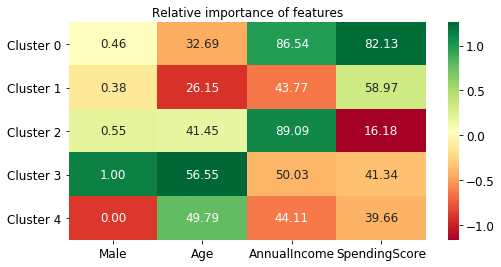

In [14]:
import seaborn as sns

all_means = X.mean(axis=0)

relative_imp = means - all_means

plt.figure(figsize=(8, 4));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, 
            annot=scaler.inverse_transform(relative_imp), 
            fmt='.2f', 
            cmap='RdYlGn', 
            robust=True, 
            square=False,
            xticklabels=col_names, 
            yticklabels=['Cluster {}'.format(x) for x in range(K)]);
#plt.savefig('out/mall_heatmap.png')

## Snakeplot

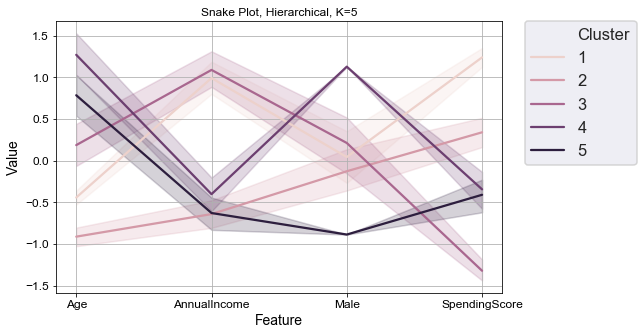

In [15]:
X_df = pd.DataFrame(X, columns=col_names)
X_df['Cluster'] = labels
X_df.head()

X_df_melt = pd.melt(X_df,
    id_vars=['Cluster'],
    value_vars=['Male', 'Age', 'AnnualIncome', 'SpendingScore'],
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, Hierarchical, K=5');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
#plt.savefig('out/mall-kmeans-5-snake.png', transparent=False);